In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import requests
import time
import gmaps
import mplleaflet
# Google developer API key
#from config import gkey

# Access maps with unique API key
#gmaps.configure(api_key=gkey)

In [100]:
#loading the CSV file and reading 
clean_crime_data = pd.read_csv("data/clean_crimeData.csv")

In [101]:
#Display dataframe
clean_crime_data.head()

,CCN,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,START_DATE,...,Lat,Log,year,month,day,hour,minute,second,quad,crimetype
0,8123749,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,8/30/2008 9:30:00 PM,...,-77.070209,38.913633,2008,8,31,20,47,0,Northwest,Non-Violent
1,8123824,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,8/31/2008 7:30:00 PM,...,-77.045323,38.908564,2008,9,1,0,45,0,Northwest,Non-Violent
2,8123835,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,8/31/2008 11:00:00 PM,...,-77.027045,38.899057,2008,9,1,3,0,0,Northeast,Non-Violent
3,8127848,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,9/9/2008 7:10:00 AM,...,-77.040089,38.909638,2008,9,9,7,46,0,Northwest,Non-Violent
4,8120153,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,8/5/2008 12:00:00 PM,...,-77.019377,38.894573,2008,8,24,20,0,0,Northeast,Non-Violent


## Assess crime in DC across years

In [102]:
#Create groups & bins to cut the dataframe
bins = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
group_names = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

In [103]:
#make a copy of the clean dataframe
clean_crime_bin = clean_crime_data[0:len(clean_crime_data)].copy()

#change the 'year' column type as integer
clean_crime_bin['year']=clean_crime_bin.year.astype('int64')

#binning of dataframe
clean_crime_bin["Year"] = pd.cut(clean_crime_bin["year"], bins, labels=group_names)

#grouby year
CrimeMethod_Cnt = pd.DataFrame(clean_crime_bin.groupby(["Year","METHOD"])["CCN"].count())
CrimeMethod_Cnt

CCN
Year METHOD       
2008 GUN      2345
     KNIFE    1036
     OTHERS  27780
2009 GUN      2010
     KNIFE    1170
     OTHERS  28400
2010 GUN      1875
     KNIFE    1183
     OTHERS  30493
2011 GUN      2210
     KNIFE    1321
     OTHERS  31837
2012 GUN      2204
     KNIFE    1263
     OTHERS  32429
2013 GUN      1961
     KNIFE    1282
     OTHERS  35181
2014 GUN      2193
     KNIFE    1171
     OTHERS  33897
2015 GUN      2125
     KNIFE    1013
     OTHERS  34030
2016 GUN      1283
     KNIFE     707
     OTHERS  26034

In [104]:
# Minor Data Munging to Re-Format the Data Frames
CMtrans = CrimeMethod_Cnt.pivot_table(columns='METHOD', index='Year', values='CCN')
CMPivoted_df = pd.DataFrame(CMtrans)
CMPivoted_df

METHOD,GUN,KNIFE,OTHERS
Year,,,
2008,2345,1036,27780
2009,2010,1170,28400
2010,1875,1183,30493
2011,2210,1321,31837
2012,2204,1263,32429
2013,1961,1282,35181
2014,2193,1171,33897
2015,2125,1013,34030
2016,1283,707,26034


In [105]:
#get all columns
cols = CMPivoted_df.columns[:]
cols

#change year (index) into numeric
CMPivoted_df.index = pd.to_numeric(CMPivoted_df.index)
print(CMPivoted_df.index)

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')


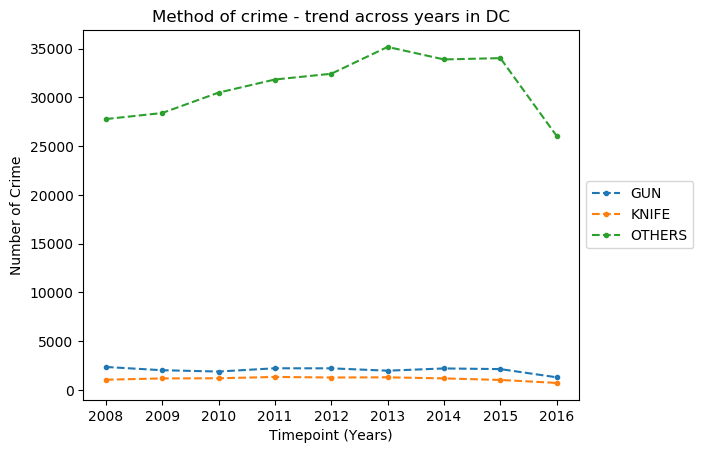

In [106]:
#plot line graph in loop
for i in cols:
    plt.plot(CMPivoted_df.index,CMPivoted_df[i],linestyle="dashed",marker='.')

#Setting legend, label
plt.title('Method of crime - trend across years in DC')
plt.xlabel("Timepoint (Years)")
plt.ylabel("Number of Crime")
plt.legend(cols, loc='center left',bbox_to_anchor=(1, .5))
plt.savefig("Method of crime_trend.jpg",bbox_inches = "tight")
plt.style.use("default")

In [107]:
#binning dataframe
CrimeType_Cnt = pd.DataFrame(clean_crime_bin.groupby(["Year","crimetype"])["CCN"].count())
CrimeType_Cnt

CCN
Year crimetype         
2008 Non-Violent  24772
     Violent       6389
2009 Non-Violent  25284
     Violent       6296
2010 Non-Violent  26967
     Violent       6584
2011 Non-Violent  28421
     Violent       6947
2012 Non-Violent  29108
     Violent       6788
2013 Non-Violent  32258
     Violent       6166
2014 Non-Violent  31021
     Violent       6240
2015 Non-Violent  31447
     Violent       5721
2016 Non-Violent  24260
     Violent       3764

In [108]:
# Minor Data Munging to Re-Format the Data Frames
CTtrans = CrimeType_Cnt.pivot_table(columns='crimetype', index='Year', values='CCN')
CrimeType_Cnt = pd.DataFrame(CTtrans)
CrimeType_Cnt

crimetype,Non-Violent,Violent
Year,,
2008,24772,6389
2009,25284,6296
2010,26967,6584
2011,28421,6947
2012,29108,6788
2013,32258,6166
2014,31021,6240
2015,31447,5721
2016,24260,3764


In [109]:
#get list of columns
cols = CrimeType_Cnt.columns[:]
cols

#convert index into numeric
CrimeType_Cnt.index = pd.to_numeric(CrimeType_Cnt.index)
print(CrimeType_Cnt.index)

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')


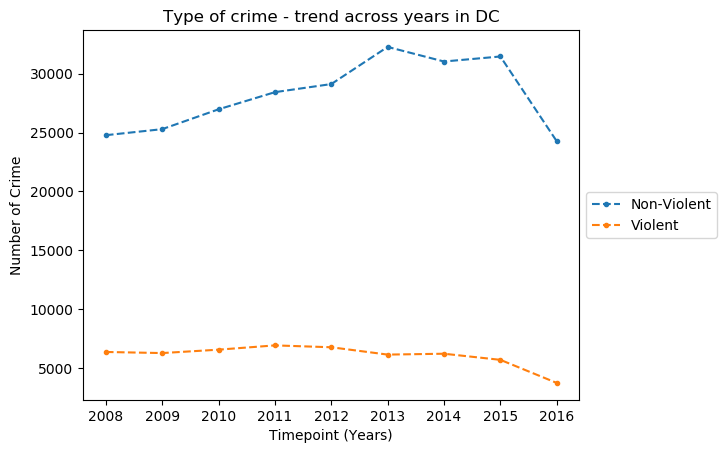

In [110]:
#plot graph in loop
for i in cols:
    plt.plot(CrimeType_Cnt.index,CrimeType_Cnt[i],linestyle="dashed",marker='.')

#set legend, label for the graph
plt.title('Type of crime - trend across years in DC')
plt.xlabel("Timepoint (Years)")
plt.ylabel("Number of Crime")
plt.legend(cols, loc='center left',bbox_to_anchor=(1, .5))
plt.savefig("Type of crime_trend.jpg",bbox_inches = "tight")

## At what time of day does crime happen most?

In [111]:
#create binds & groups
bins = [0, 5, 11, 17, 23]
group_names = ["0 to 5","6 to 11","12 to 17","18 to 23"]

In [112]:
#copy clean dataframe 
crime_hour_bin = clean_crime_data[0:len(clean_crime_data)].copy()
crime_hour_bin

,CCN,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,START_DATE,...,Lat,Log,year,month,day,hour,minute,second,quad,crimetype
0,8123749,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,8/30/2008 9:30:00 PM,...,-77.070209,38.913633,2008,8,31,20,47,0,Northwest,Non-Violent
1,8123824,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,8/31/2008 7:30:00 PM,...,-77.045323,38.908564,2008,9,1,0,45,0,Northwest,Non-Violent
2,8123835,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,8/31/2008 11:00:00 PM,...,-77.027045,38.899057,2008,9,1,3,0,0,Northeast,Non-Violent
3,8127848,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,9/9/2008 7:10:00 AM,...,-77.040089,38.909638,2008,9,9,7,46,0,Northwest,Non-Violent
4,8120153,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,8/5/2008 12:00:00 PM,...,-77.019377,38.894573,2008,8,24,20,0,0,Northeast,Non-Violent
5,8120189,EVENING,THEFT/OTHER,OTHERS,G STREET NW AND 12TH STREET NW,1.0,105.0,2,2C,8/24/2008 4:30:00 PM,...,-77.028078,38.898315,2008,8,24,21,40,0,Northeast,Non-Violent
6,8120280,MIDNIGHT,THEFT/OTHER,OTHERS,1000 - 1099 BLOCK OF 26TH STREET NW,2.0,207.0,2,2A,8/24/2008 11:30:00 PM,...,-77.054750,38.903263,2008,8,25,6,0,0,Northwest,Non-Violent
7,8123978,DAY,BURGLARY,OTHERS,1707 - 1799 BLOCK OF S STREET NW,3.0,301.0,2,2B,8/31/2008 5:30:00 PM,...,-77.040472,38.914088,2008,9,1,13,30,0,Northwest,Non-Violent
8,8123989,DAY,THEFT/OTHER,OTHERS,1300 - 1699 BLOCK OF CONNECTICUT AVENUE NW,3.0,308.0,2,2B,9/1/2008 1:20:00 PM,...,-77.043607,38.909927,2008,9,1,14,0,0,Northwest,Non-Violent
9,8124024,EVENING,THEFT/OTHER,OTHERS,3RD STREET SW AND MARYLAND AVENUE SW,1.0,102.0,2,2C,9/1/2008 3:15:00 PM,...,-77.015172,38.888185,2008,9,1,17,10,0,Southeast,Non-Violent


In [113]:
#bin copied dataframe
crime_hour_bin["hour"] = pd.cut(crime_hour_bin["hour"], bins, labels=group_names)
CrimeTime_Cnt = pd.DataFrame(crime_hour_bin.groupby(["hour"])["CCN"].count())
CrimeTime_Cnt

,CCN
hour,
0 to 5,36974
6 to 11,77656
12 to 17,116921
18 to 23,99830


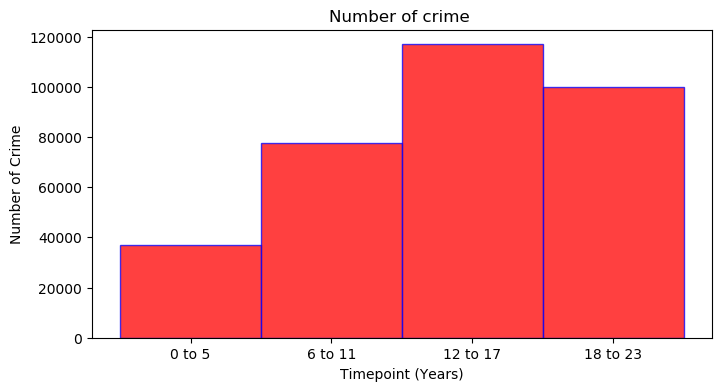

In [114]:
#plot graph
plt.figure(figsize=(8,4))
plt.bar(CrimeTime_Cnt.index,CrimeTime_Cnt["CCN"],color='r',alpha=.75,align="center", width=1,edgecolor ="b")

#set legend & label
plt.title('Number of crime ')
plt.xlabel("Timepoint (Years)")
plt.ylabel("Number of Crime")
plt.savefig("Method of crime_trend.jpg",bbox_inches = "tight")

In [115]:
#bins & groups
bins = [0, 5, 11, 17, 23]
group_names = ["0 to 5","6 to 11","12 to 17","18 to 23"]

#copy dataframe
crime_hour_bin = clean_crime_data[0:len(clean_crime_data)].copy()
crime_hour_bin

#bin & group dataframe
crime_hour_bin["hour"] = pd.cut(crime_hour_bin["hour"], bins, labels=group_names, include_lowest=True)
Offense_Cnt = pd.DataFrame(crime_hour_bin.groupby(["hour", "OFFENSE"])["CCN"].count())
Offense_Cnt

CCN
hour     OFFENSE                          
0 to 5   ARSON                          99
         ASSAULT W/DANGEROUS WEAPON   6859
         BURGLARY                     4024
         HOMICIDE                     1234
         MOTOR VEHICLE THEFT          4496
         ROBBERY                      9579
         SEX ABUSE                     661
         THEFT F/AUTO                10055
         THEFT/OTHER                 11189
6 to 11  ARSON                          65
         ASSAULT W/DANGEROUS WEAPON   2885
         BURGLARY                     6847
         MOTOR VEHICLE THEFT         10259
         ROBBERY                      4257
         SEX ABUSE                     483
         THEFT F/AUTO                26310
         THEFT/OTHER                 26550
12 to 17 ARSON                          86
         ASSAULT W/DANGEROUS WEAPON   5397
         BURGLARY                    10337
         MOTOR VEHICLE THEFT         10536
         ROBBERY                      8193
         SEX ABUSE                     610
         THEFT F/AUTO                29974
         THEFT/OTHER                 51788
18 to 23 ARSON                          76
         ASSAULT W/DANGEROUS WEAPON   8280
         BURGLARY                    10082
         MOTOR VEHICLE THEFT          7875
         ROBBERY                     13199
         SEX ABUSE                     644
         THEFT F/AUTO                18857
         THEFT/OTHER                 40817

In [116]:
# Minor Data Munging to Re-Format the Data Frames
OFFtrans = Offense_Cnt.pivot_table(columns='OFFENSE', index='hour', values='CCN')
Offense_Cnt = pd.DataFrame(OFFtrans)
Offense_Cnt

OFFENSE,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
hour,,,,,,,,,
0 to 5,99.0,6859.0,4024.0,1234.0,4496.0,9579.0,661.0,10055.0,11189.0
6 to 11,65.0,2885.0,6847.0,NaN,10259.0,4257.0,483.0,26310.0,26550.0
12 to 17,86.0,5397.0,10337.0,NaN,10536.0,8193.0,610.0,29974.0,51788.0
18 to 23,76.0,8280.0,10082.0,NaN,7875.0,13199.0,644.0,18857.0,40817.0


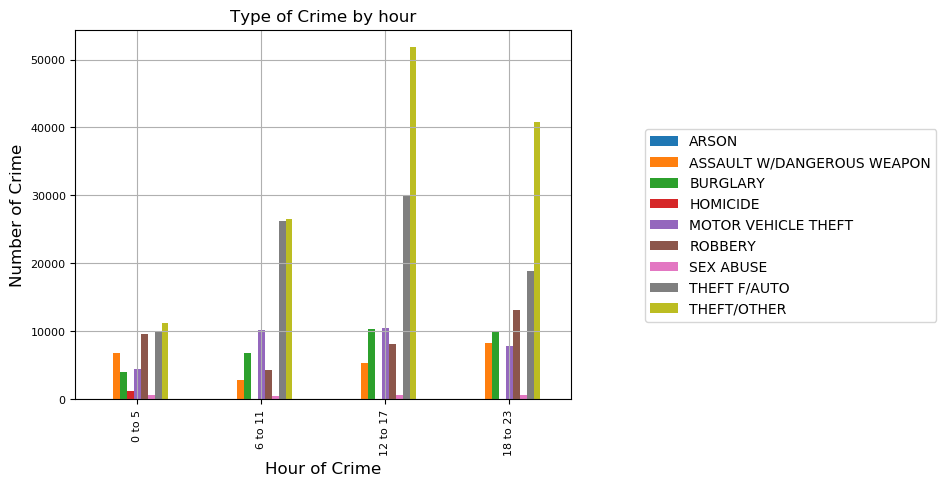

<Figure size 640x480 with 0 Axes>

In [117]:
#plot multibar
Offense_Cnt.plot.bar()
plt.title('Type of Crime by hour')

#set tick size
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

#set label
plt.ylabel("Number of Crime", fontsize=12)
plt.xlabel("Hour of Crime", fontsize=12)

#display legend in box outside the plot area
plt.legend(loc=0, bbox_to_anchor=(1.75, 0.75
                                 ))
#show & save the chart
plt.grid()
plt.show()
plt.savefig("Type of Crime by hour.jpg",bbox_inches = "tight")

## Finding the total amount of each offense by method

In [118]:
# Total number of "Crimes" were reported unique
crime_count = len(clean_crime_data['OFFENSE'].unique().tolist())
crime_count
crime_method = clean_crime_data.groupby("OFFENSE")["METHOD"].count()
crime_method.head(10)

OFFENSE
ARSON                            326
ASSAULT W/DANGEROUS WEAPON     23421
BURGLARY                       31290
HOMICIDE                        1234
MOTOR VEHICLE THEFT            33166
ROBBERY                        35228
SEX ABUSE                       2398
THEFT F/AUTO                   85196
THEFT/OTHER                   130344
Name: METHOD, dtype: int64

In [119]:
bins = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
group_names = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

clean_crime_bin = clean_crime_data[0:len(clean_crime_data)].copy()
clean_crime_bin['year']=clean_crime_bin.year.astype('int64')
clean_crime_bin["Year"] = pd.cut(clean_crime_bin["year"], bins, labels=group_names)
CrimeMethod_Cnt = pd.DataFrame(clean_crime_bin.groupby(["Year","METHOD"])["CCN"].count())
CrimeMethod_Cnt

# reset index and then in place = True
CrimeMethod_Cnt.reset_index(inplace=True)
CrimeMethod_Cnt

,Year,METHOD,CCN
0,2008,GUN,2345
1,2008,KNIFE,1036
2,2008,OTHERS,27780
3,2009,GUN,2010
4,2009,KNIFE,1170
5,2009,OTHERS,28400
6,2010,GUN,1875
7,2010,KNIFE,1183
8,2010,OTHERS,30493
9,2011,GUN,2210


In [120]:
CrimeMethod_Cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
Year      27 non-null category
METHOD    27 non-null object
CCN       27 non-null int64
dtypes: category(1), int64(1), object(1)
memory usage: 939.0+ bytes


In [121]:
crime_CCN = clean_crime_data.groupby("year")["CCN"].count()
crime_CCN.head(10)

year
2008    34170
2009    31161
2010    31580
2011    33551
2012    35368
2013    35896
2014    38424
2015    37261
2016    37168
2017    28024
Name: CCN, dtype: int64

## Where gun or knife crimes more frequent in certain years?

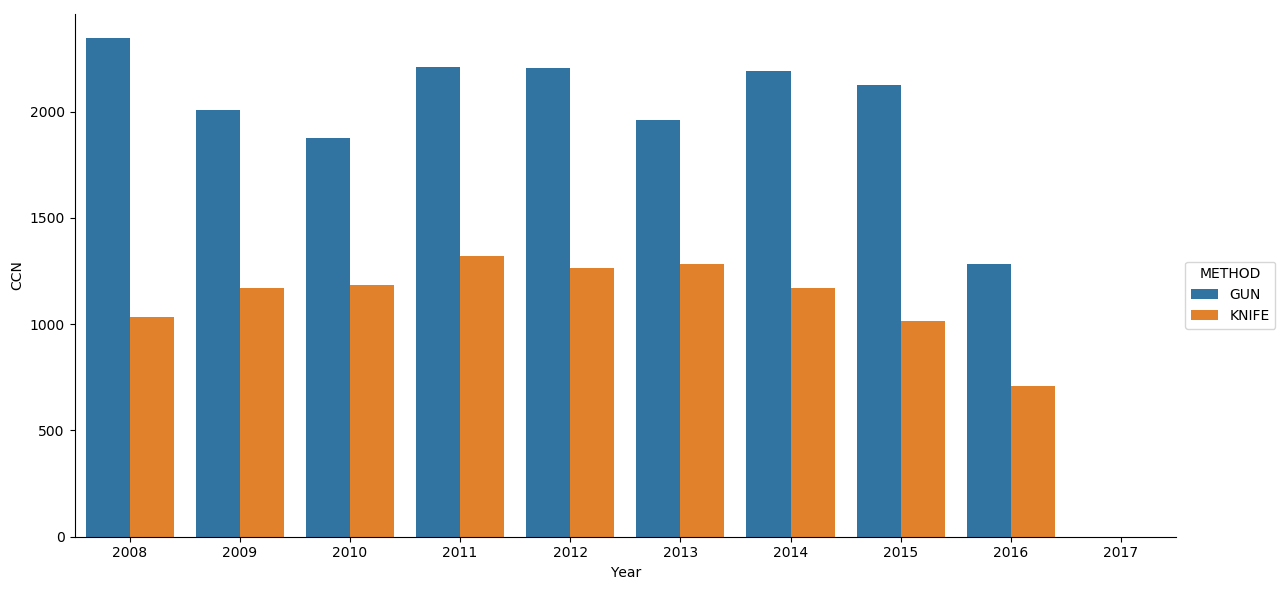

In [122]:
# Using searborn made a bar plot setting x axis is year, y is CCN and  coloring is Method by fixing the canvas size 16x10
# plt.subplots(figsize=(16, 10))
sns.factorplot(x='Year', y='CCN', hue='METHOD', data=CrimeMethod_Cnt.loc[CrimeMethod_Cnt.METHOD != 'OTHERS'], kind='bar', size=6, aspect=2)

In [123]:
CrimeMethod_Cnt.dtypes

Year      category
METHOD      object
CCN          int64
dtype: object

In [124]:
homicide_count=clean_crime_data.groupby('METHOD').count()
homicide_count

,CCN,SHIFT,OFFENSE,BLOCK,DISTRICT,PSA,WARD,ANC,START_DATE,END_DATE,Lat,Log,year,month,day,hour,minute,second,quad,crimetype
METHOD,,,,,,,,,,,,,,,,,,,,
GUN,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978,20978
KNIFE,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208
OTHERS,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417,310417


In [125]:
# Calculating the number of "Shifts" in each District using group by
crime_shift = clean_crime_data.groupby("METHOD")["OFFENSE"].count()

crime_shift

METHOD
GUN        20978
KNIFE      11208
OTHERS    310417
Name: OFFENSE, dtype: int64

In [126]:
# The district average based on the Shift calculated and showing in the DataFrame and rounding the "Average" by 2 decimals
dict_average = clean_crime_data.groupby(["METHOD"]).mean()

In [127]:
dict_average.round(2)

,CCN,DISTRICT,PSA,WARD,Lat,Log,year,month,day,hour,minute,second
METHOD,,,,,,,,,,,,
GUN,12280410.45,4.91,497.99,5.74,-76.99,38.89,2012.17,6.67,16.15,11.75,25.17,5.48
KNIFE,12456875.12,4.62,467.78,5.32,-76.99,38.90,2012.36,6.57,16.00,12.32,25.80,5.45
OTHERS,12685692.54,3.62,366.73,4.33,-77.01,38.91,2012.58,6.66,15.97,13.36,26.39,6.93


## Which ward had the most crime?

In [128]:
# Finding the the number of "Report Date" Total and printing

report_data = clean_crime_data.groupby(["WARD"]).count()
report_data.head(10)

,CCN,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,ANC,START_DATE,END_DATE,Lat,Log,year,month,day,hour,minute,second,quad,crimetype
WARD,,,,,,,,,,,,,,,,,,,,
1,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009,49009
2,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196,62196
3,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357
4,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149,31149
5,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951,44951
6,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114,53114
7,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660,42660
8,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167,41167


## The Number of Criminal Case Numbers results by group and unique


In [129]:
# Finding the Criminal case Numbers and showing in the DataFrame
CCN_count = len((clean_crime_data['CCN'].unique().tolist()))
CCN_count

342502

In [130]:
#Dataframe shows number of criminal case numbers
crime_CCN = clean_crime_data.groupby(["CCN"]).sum()
crime_CCN.head(15)

,DISTRICT,PSA,WARD,Lat,Log,year,month,day,hour,minute,second
CCN,,,,,,,,,,,
100060,5.0,506.0,5,-76.975116,38.917282,2010,7,16,14,0,0
162302,1.0,104.0,6,-76.999520,38.904680,2009,11,12,18,0,0
174072,3.0,305.0,1,-77.022950,38.917240,2009,12,6,23,30,0
1020310,1.0,107.0,6,-76.997330,38.885130,2016,2,9,13,46,39
2001387,3.0,306.0,1,-77.021910,38.919490,2009,10,20,8,59,0
2111617,1.0,107.0,6,-76.997560,38.894380,2017,2,6,20,11,14
4104147,1.0,105.0,6,-77.012180,38.871390,2013,4,16,0,0,0
4147180,1.0,107.0,6,-76.994360,38.891480,2008,10,24,0,0,0
4172632,5.0,502.0,5,-76.988285,38.927719,2010,1,21,0,0,0


## The number of crimes displayed by year

In [131]:
# finding the list of the years of crimes using group by function
crime_year = clean_crime_data.groupby(["year"]).sum()
crime_year

,CCN,DISTRICT,PSA,WARD,Lat,Log,month,day,hour,minute,second
year,,,,,,,,,,,
2008,276642376587,127207.0,12950004.0,152720,-2.631373e+06,1.329379e+06,225802,548705,444790,805691,0
2009,283547594542,115962.0,11823277.0,138555,-2.399690e+06,1.212329e+06,202198,495605,405724,718335,0
2010,318877067014,120588.0,12255764.0,142530,-2.431927e+06,1.228624e+06,215488,507823,419142,746875,0
2011,372507705693,125215.0,12724724.0,148637,-2.583729e+06,1.305325e+06,230652,536498,444856,808781,0
2012,428193897167,132840.0,13453221.0,157807,-2.723615e+06,1.376002e+06,237029,561534,462398,976567,96
2013,470666616253,135484.0,13713227.0,160976,-2.764257e+06,1.396564e+06,241960,574371,474317,960482,0
2014,542739070829,144089.0,14582624.0,171151,-2.958918e+06,1.494975e+06,264233,612073,510333,1024051,0
2015,563394598551,137687.0,13938611.0,164744,-2.869398e+06,1.449719e+06,254683,597104,497205,1053911,412079
2016,599214034719,134257.0,13595133.0,162097,-2.862264e+06,1.446074e+06,250221,594558,498875,1093093,1089936


## Which district has more crime?

In [132]:
bins = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
group_names = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

# create table to separate number of crimes in each district
clean_crime_bin = clean_crime_data[0:len(clean_crime_data)].copy()
clean_crime_bin['year']=clean_crime_bin.year.astype('int64')
clean_crime_bin["Year"] = pd.cut(clean_crime_bin["year"], bins, labels=group_names)
CrimeDistrict_Cnt = pd.DataFrame(clean_crime_bin.groupby(["DISTRICT"])["CCN"].count())
CrimeDistrict_Cnt

,CCN
DISTRICT,
1.0,58364
2.0,54446
3.0,57316
4.0,44897
5.0,45495
6.0,43880
7.0,38205


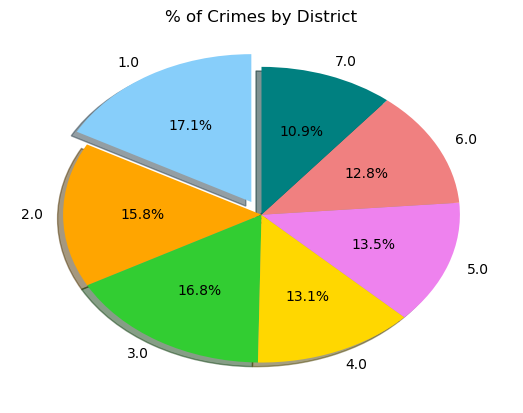

In [133]:
# group crimes by district, then retrieve the sum
crime_by_dist = clean_crime_data.groupby('DISTRICT')
dist_sum = crime_by_dist.sum()['CCN']


# generate labels and colors and plot a pie chart to show % of crimes in each district
labels = dist_sum.index
colors = ["lightskyblue", "orange", "limegreen", "gold", "violet", "lightcoral", "teal"]
explode = [.1, 0, 0, 0, 0, 0, 0]
plt.pie(dist_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
       shadow = True)
plt.title('% of Crimes by District')
plt.savefig("% of Crimes by District")

## What type of crime is most common in each district?

In [134]:
# separate type of crime in each district by violent and non-violent
crime_type_dist = pd.DataFrame(clean_crime_bin.groupby(["DISTRICT", "crimetype"])["CCN"].count())
crime_type_dist

CCN
DISTRICT crimetype         
1.0      Non-Violent  50329
         Violent       8035
2.0      Non-Violent  50672
         Violent       3774
3.0      Non-Violent  48524
         Violent       8792
4.0      Non-Violent  36309
         Violent       8588
5.0      Non-Violent  36346
         Violent       9149
6.0      Non-Violent  31979
         Violent      11901
7.0      Non-Violent  26163
         Violent      12042

In [135]:
# re format table
crime_type_dist_cnt = crime_type_dist.pivot_table(columns='crimetype', index='DISTRICT', values='CCN')
CrimeType_DisCnt = pd.DataFrame(crime_type_dist_cnt)
CrimeType_DisCnt

crimetype,Non-Violent,Violent
DISTRICT,,
1.0,50329,8035
2.0,50672,3774
3.0,48524,8792
4.0,36309,8588
5.0,36346,9149
6.0,31979,11901
7.0,26163,12042


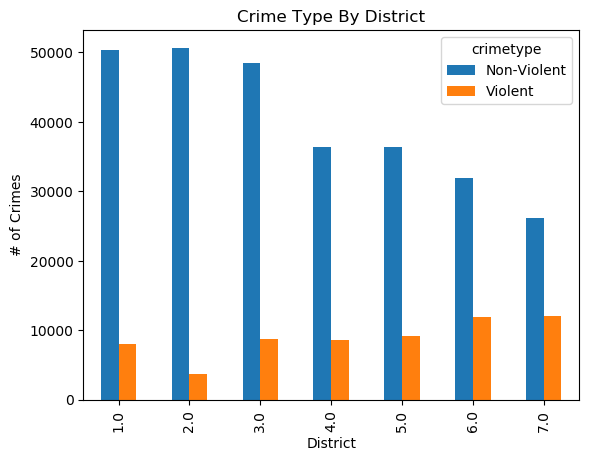

<Figure size 640x480 with 0 Axes>

In [136]:
# create multibar plot to compare numbers
ax = CrimeType_DisCnt[['Non-Violent', 'Violent']].plot(kind='bar', title = 'Crime Type By District', legend=True)
ax.set_xlabel("District")
ax.set_ylabel("# of Crimes")
plt.show()
plt.savefig("Crime Type By District")

## Which quad has the most crime?

In [137]:
# create bins and table to separate crime by quad
clean_crime_bin = clean_crime_data[0:len(clean_crime_data)].copy()
clean_crime_bin['year']=clean_crime_bin.year.astype('int64')
clean_crime_bin["Year"] = pd.cut(clean_crime_bin["year"], bins, labels=group_names)
crime_quad = pd.DataFrame(clean_crime_bin.groupby(["quad"])["CCN"].count())
crime_quad

,CCN
quad,
Northeast,194071
Northwest,66701
Southeast,81816
Southwest,15


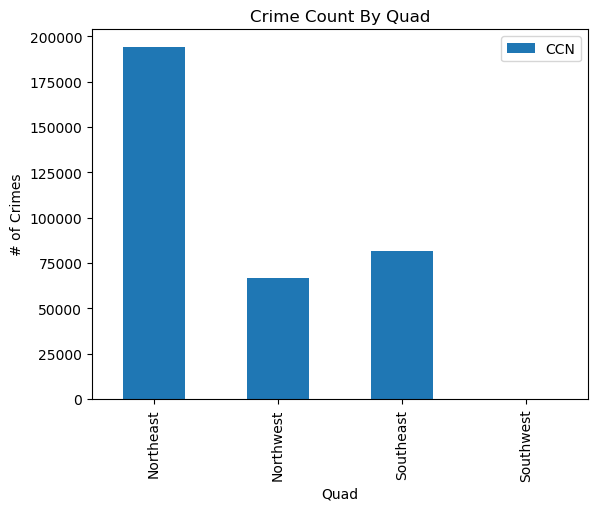

<Figure size 640x480 with 0 Axes>

In [138]:
# plot crime count by quad using a bar
ax = crime_quad[['CCN']].plot(kind='bar', title = 'Crime Count By Quad', legend=True)
ax.set_xlabel("Quad")
ax.set_ylabel("# of Crimes")
plt.show()
plt.savefig("Crime Count By Quad")

## Which quad has the most violent crimes?

In [139]:
# separate violent and non-violent crime numbers
crime_type_quad = pd.DataFrame(clean_crime_bin.groupby(["quad", "crimetype"])["CCN"].count())

# display table showing new data
crime_type_quad_cnt = crime_type_quad.pivot_table(columns='crimetype', index='quad', values='CCN')
CrimeType_QuadCnt = pd.DataFrame(crime_type_quad_cnt)
CrimeType_QuadCnt

crimetype,Non-Violent,Violent
quad,,
Northeast,158461,35610
Northwest,61006,5695
Southeast,60841,20975
Southwest,14,1


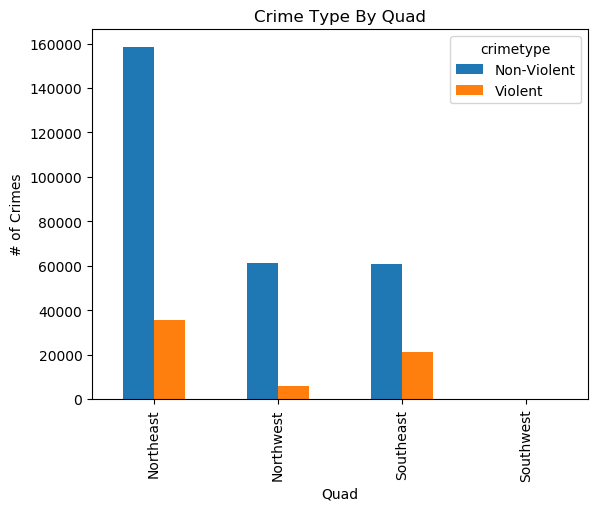

<Figure size 640x480 with 0 Axes>

In [140]:
# create multibar plot comparing violent and non-violent crimes in each quad
ax = CrimeType_QuadCnt[['Non-Violent', 'Violent']].plot(kind='bar', title = 'Crime Type By Quad', legend=True)
ax.set_xlabel("Quad")
ax.set_ylabel("# of Crimes")
plt.show()
plt.savefig("Crime Type By Quad")

In [141]:
!pip install mapsplotlib

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [142]:
!pip install mplleaflet

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [143]:
from mapsplotlib import mapsplot as mplt

In [ ]:
#mplt.register_api_key(gkey)